# Task 1: 20 data science questions that you can explore using your dataset of 300 students with columns for name, university, and CGPA:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("students_data.csv", header=None)
df

,0,1,2
0,Oliver Thompson,Harvard University,2
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.3
...,...,...,...
295,Max Turner,University of Amsterdam,3.09
296,Brooklyn Wilson,University of Copenhagen,3.23
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
298,Gabriella Lee,King's College London,2.5


In [5]:
column_names = ['Name', 'University', 'CGPA']
df.columns = column_names

In [6]:
df

,Name,University,CGPA
0,Oliver Thompson,Harvard University,2
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.3
...,...,...,...
295,Max Turner,University of Amsterdam,3.09
296,Brooklyn Wilson,University of Copenhagen,3.23
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
298,Gabriella Lee,King's College London,2.5


## Data Pre-processing

In [22]:
df['CGPA'].replace('Annual ', np.nan, inplace=True)

In [23]:
df['CGPA'].replace('2.6/4', '2.6', inplace=True)
df['CGPA'].replace('3.93/4', '3.93', inplace=True)

In [24]:
df['CGPA'].replace('7.5', np.nan, inplace=True)

In [25]:
df['CGPA'].replace('3.08(updated after 4 semester).', 3.08, inplace=True)
df['CGPA'].replace('3.21 (6th semester completed)', 3.21, inplace=True)

In [26]:
df.isna().sum()

Name            0
University      0
CGPA           15
Name_Length     0
dtype: int64

In [27]:
df['CGPA'].fillna(df.CGPA.astype(float).mean(), inplace=True)

In [28]:
df.isna().sum()

Name           0
University     0
CGPA           0
Name_Length    0
dtype: int64

## 1. What are the top 5 universities with the highest average CGPA?

In [14]:
# Clean the 'CGPA' column by removing non-numeric characters
df['CGPA'] = df['CGPA'].str.replace('[^\d.]', '', regex=True)
df['CGPA'] = pd.to_numeric(df.CGPA, errors='coerce')

top_5 = df.groupby('University')['CGPA'].mean().sort_values(ascending=False).head(5)
top_5

University
University of Toronto                                        3.525000
University of Southern California (USC)                      3.455000
University of Bristol                                        3.440000
University of Michigan, Ann Arbor                            3.433333
Swiss Federal Institute of Technology Zurich (ETH Zurich)    3.410000
Name: CGPA, dtype: float64

## 2. Is there a correlation between the CGPA and the length of the student's name?

In [15]:
df['Name_Length'] = df['Name'].str.len()
df

,Name,University,CGPA,Name_Length
0,Oliver Thompson,Harvard University,2.00,15
1,Emma Johnson,Stanford University,3.82,12
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.60,10
3,Olivia Brown,University of Cambridge,2.93,12
4,Noah Davis,University of Oxford,3.30,10
...,...,...,...,...
295,Max Turner,University of Amsterdam,3.09,10
296,Brooklyn Wilson,University of Copenhagen,3.23,15
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.20,13
298,Gabriella Lee,King's College London,2.50,13


In [16]:
df['CGPA'].corr(df.Name_Length)

# A positive value close to 1 indicates a strong positive correlation 
# (as CGPA increases, the length of the student's name tends to increase). 

0.013791382774874452

## 3. How does the CGPA vary across different universities?

In [17]:
cgpa_stats = df.groupby('University')['CGPA'].agg(['mean', 'median', 'std', 'min', 'max'])
cgpa_stats

,mean,median,std,min,max
University,,,,,
California Institute of Technology (Caltech),2.996667,2.950,0.411987,2.61,3.43
Columbia University,3.006667,2.845,0.344654,2.70,3.59
Cornell University,3.141667,3.400,0.549014,2.24,3.66
Harvard University,2.810000,2.975,0.528394,2.00,3.50
Imperial College London,3.138333,3.055,0.381650,2.70,3.79
...,...,...,...,...,...
University of Washington,3.038333,3.090,0.352387,2.50,3.58
University of Western Australia,3.110000,3.260,0.359305,2.70,3.37
University of Wisconsin-Madison,2.951667,2.925,0.373117,2.40,3.40


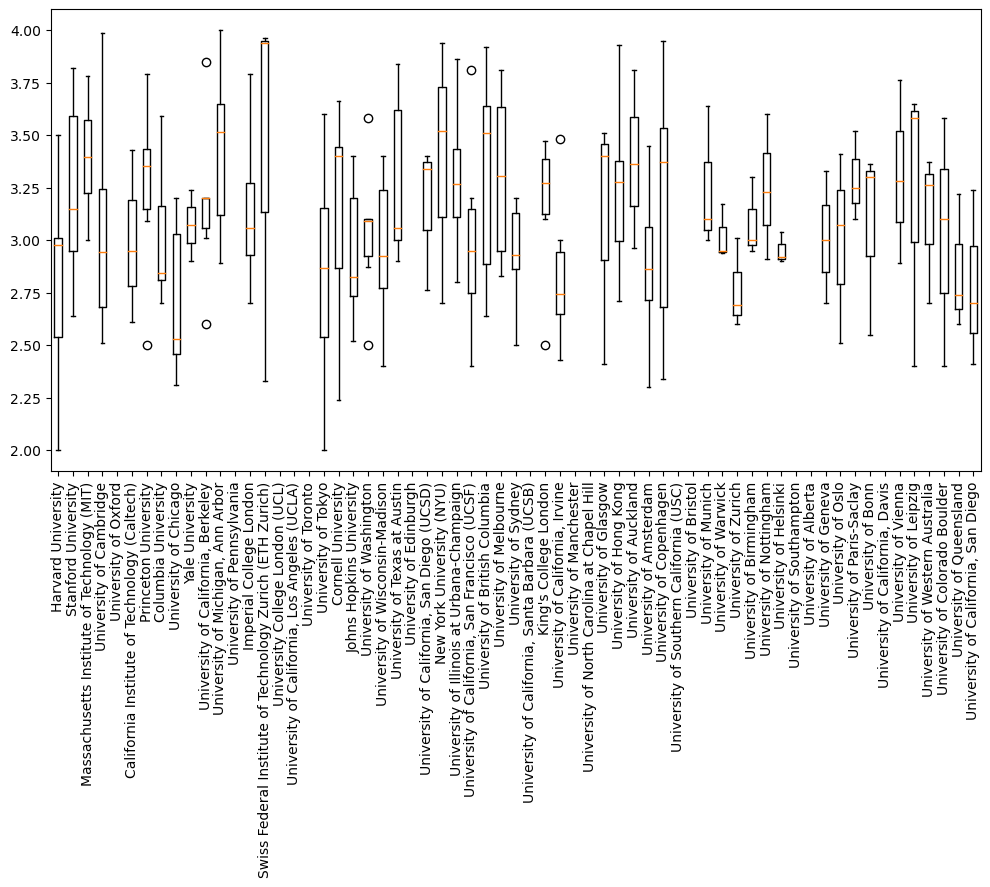

In [18]:
# box plot for cgpa stats
data_plot = [df[df.University == uni]['CGPA'] for uni in df.University.unique()]
plt.figure(figsize=(12, 6))
plt.boxplot(data_plot, labels=df.University.unique())
plt.xticks(rotation=90)
plt.show()

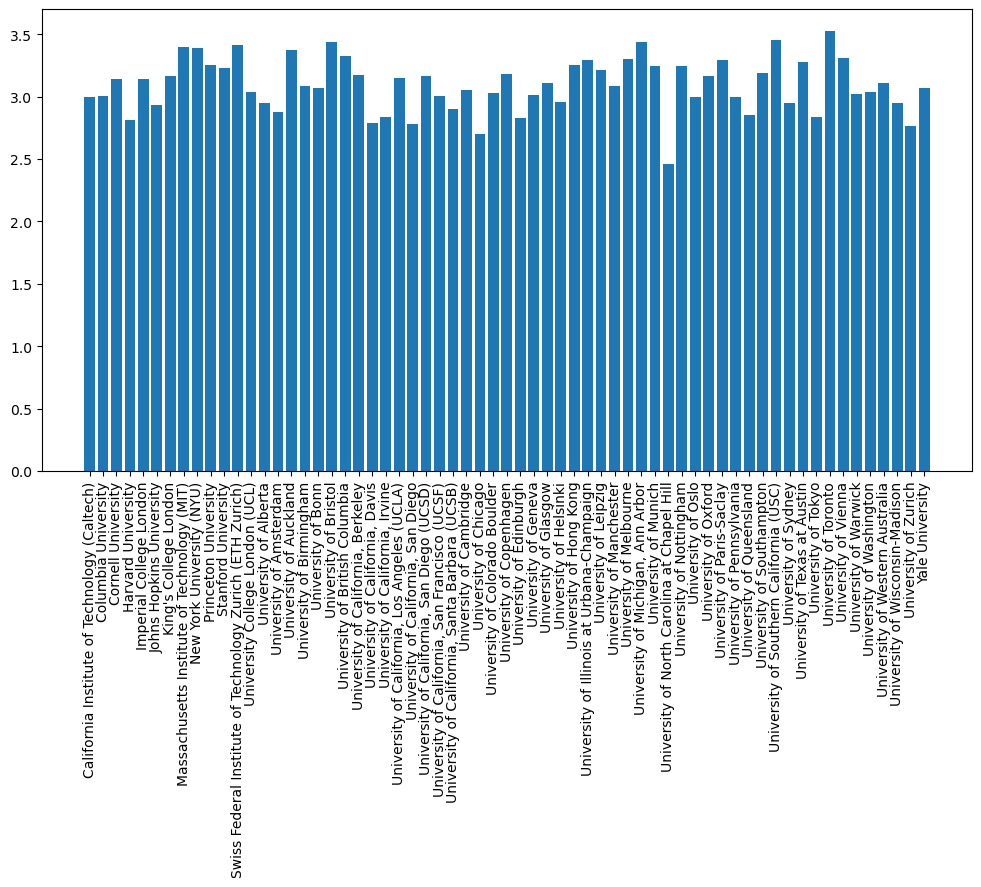

In [19]:
# plot mean
plt.figure(figsize=(12,6))
plt.bar(cgpa_stats.index, cgpa_stats['mean'])
plt.xticks(rotation=90)
plt.show()

## 4. Can we predict a student's CGPA based on the length of their name using linear regression?

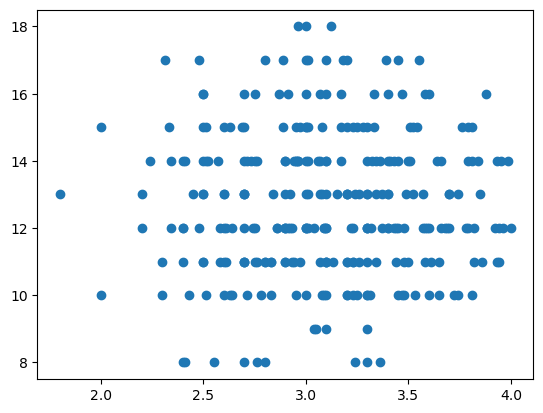

In [20]:
plt.scatter(df.CGPA, df.Name_Length)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Name_Length']], df.CGPA)

new_data = pd.DataFrame(df.Name_Length)
predictions = model.predict(new_data)
# print(predictions)

name_length = 15
print(f'student with {name_length} chars name has: {model.predict([[name_length]])} cgpa')

student with 15 chars name has: [3.09802569] cgpa


D:\apps\anaconda\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Which university has the highest number of students with a CGPA above a certain threshold?

In [30]:
threshold = 3

df.loc[df.CGPA > threshold].groupby("University").value_counts().idxmax()

('University of California, Berkeley', 'Aria Clark', 3.2, 10)

## 6. Can we identify any outliers in the CGPA distribution within each university?

In [31]:
df.describe()

,CGPA,Name_Length
count,300.000000,300.000000
mean,3.091905,12.680000
std,0.428361,2.177169
min,1.800000,8.000000
25%,2.795000,11.000000
50%,3.091905,12.000000
75%,3.400000,14.000000
max,4.000000,18.000000


<Axes: >

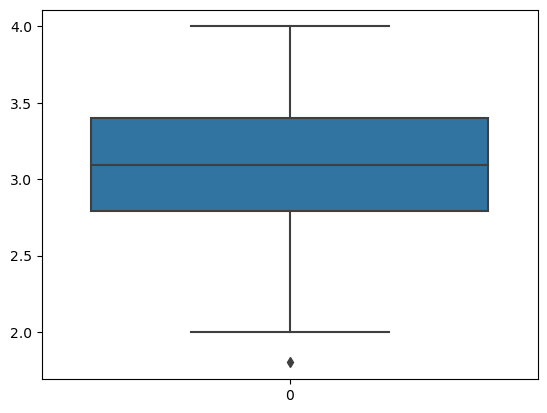

In [32]:
import seaborn as sns

sns.boxplot(df.CGPA)

In [33]:
# as we can see there is one outlier in lower boundary

# IQR
Q1 = df.CGPA.quantile(0.25)
Q3 = df.CGPA.quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
lower_array = df.loc[df.CGPA <= lower_bound]

df.drop(index=lower_array.index, inplace=True)

<Axes: >

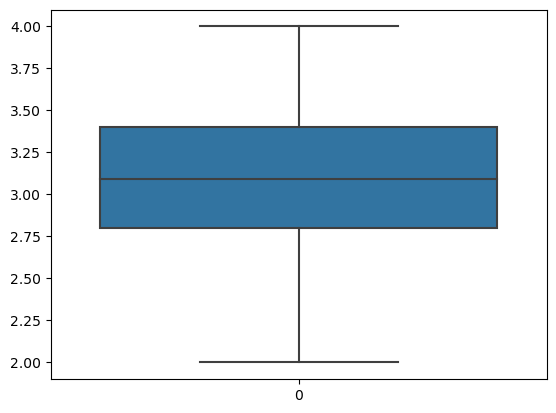

In [34]:
# outlier emoved
sns.boxplot(df.CGPA)

## 7. Can we cluster students based on their CGPA using k-means clustering?

D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\apps\anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


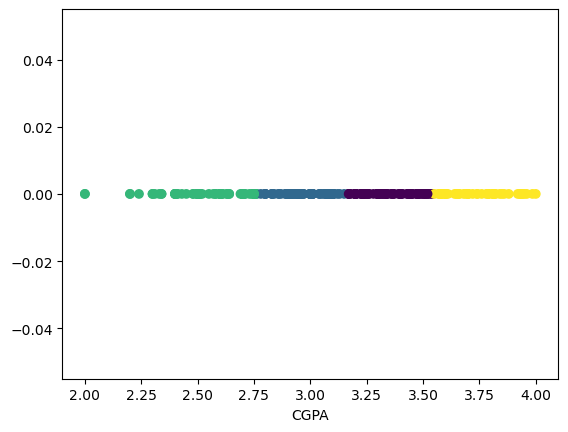

In [35]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, random_state=40)
df['Cluster'] = kmeans.fit_predict(df[['CGPA']])

plt.scatter(df['CGPA'], np.zeros(len(df)), c=df.Cluster)
plt.xlabel("CGPA")
plt.show()

## 8. What is the average CGPA for each cluster identified in the previous question?

In [96]:
df.groupby('Cluster')['CGPA'].mean()

Cluster
0    3.751596
1    3.004104
2    2.530676
3    3.344909
Name: CGPA, dtype: float64

## 9. Can we classify students into universities based on their CGPA using a decision tree?

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separate features (CGPA) and target (University)
X = df[['CGPA']]
y = df['University']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# predict on test data
y_pred = classifier.predict(X_test)

new_cgpa = 3.2
print(f'Student with {new_cgpa} cgpa is from: {classifier.predict([[new_cgpa]])}')

Student with 3.2 cgpa is from: ["King's College London"]


D:\apps\anaconda\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 10. How accurate is the decision tree model in predicting the university?

In [127]:
# model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accurracy: {accuracy}')

Model Accurracy: 0.016666666666666666


## 11. What is the overall average CGPA across all universities?

In [134]:
print(f'Average CGPA: {df.CGPA.mean()}')

Average CGPA: 3.091905263157897


## 12. Can we build a regression model to predict a student's CGPA based on their university?

In [220]:
from sklearn.preprocessing import OneHotEncoder

# Convert 'University' column into dummy variables/numerical data using one-hot encoding
encoder = OneHotEncoder(sparse=False)
university_encoded = encoder.fit_transform(df[['University']])

# Create a new DataFrame with the encoded university names
university_df = pd.DataFrame(university_encoded, columns=encoder.get_feature_names_out(['University']))

# Concatenate the new DataFrame with the 'CGPA' column to form the feature matrix
X = pd.concat([university_df, df['CGPA']], axis=1)

# Separate the target variable 'CGPA' from the feature matrix
X_features = X.drop('CGPA', axis=1)
y = X['CGPA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test Predict CGPA for new data
student_universities = ['Harvard University', 'Stanford University', 'Yale University']
new_data = pd.DataFrame({'University': student_universities})
student_university_encoded = encoder.transform(new_data)
new_data_features = pd.DataFrame(student_university_encoded, columns=encoder.get_feature_names_out(['University']))

predictions = model.predict(new_data_features)
predictions

D:\apps\anaconda\files\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([2.81738281, 3.13867188, 3.24316406])

## 13. How well does the regression model perform in predicting the CGPA?

In [223]:
from sklearn.metrics import r2_score

predictions = model.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")

R-squared (R2): -0.4129463082836211


## 14. Are there any missing or erroneous values in the CGPA column?

In [225]:
# as we have preprocessed/cleaned the data. so It will not have any missing values
df.CGPA.isna().sum()

0

## 15. What is the range of CGPA scores for each university?

In [249]:
df.groupby("University")['CGPA'].agg(['min', 'max'])

,min,max
University,,
California Institute of Technology (Caltech),2.61,3.43
Columbia University,2.70,3.59
Cornell University,2.24,3.66
Harvard University,2.00,3.50
Imperial College London,2.70,3.79
...,...,...
University of Washington,2.50,3.58
University of Western Australia,2.70,3.37
University of Wisconsin-Madison,2.40,3.40


## 16. Can we identify any clusters or groups of students based on the CGPA and university using hierarchical clustering?

In [63]:
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# required data
data = df[['CGPA', 'University']]

# Encode the 'University' column into numerical values using LabelEncoder
encoder = LabelEncoder()
data['University'] = encoder.fit_transform(data['University'])

# Calculate the pairwise distance between data points using Euclidean distance
distances = pdist(data, metric='euclidean')

# # Convert the pairwise distances into a square distance matrix
distance_matrix = squareform(distances)

# # Perform hierarchical clustering using the linkage function
clusters = linkage(distance_matrix, method='ward')

clusters

C:\Users\Hp\AppData\Local\Temp\ipykernel_5932\514498369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['University'] = encoder.fit_transform(data['University'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_5932\514498369.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = linkage(distance_matrix, method='ward')


array([[1.10000000e+02, 2.10000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.77000000e+02, 2.99000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.70000000e+01, 1.17000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [5.89000000e+02, 5.91000000e+02, 1.46495802e+03, 1.20000000e+02],
       [5.92000000e+02, 5.93000000e+02, 2.69721742e+03, 1.79000000e+02],
       [5.94000000e+02, 5.95000000e+02, 4.78240085e+03, 2.99000000e+02]])

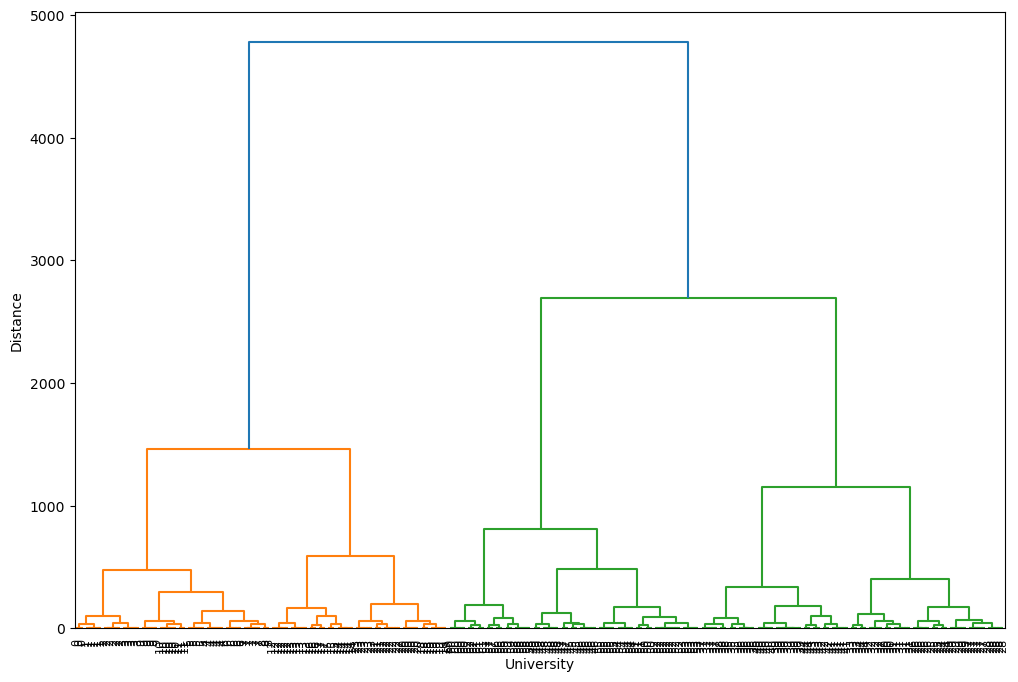

In [68]:
plt.figure(figsize=(12, 8))
dendrogram(clusters, labels=data['University'].values, leaf_font_size=8, leaf_rotation=90)
plt.xlabel('University')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

## 18. Can we build a classification model to predict the university based on the CGPA and the length of the student's name?

In [77]:
from sklearn.linear_model import LogisticRegression

# Features (CGPA and Name Length) and target (University)
X = df[['CGPA', 'Name_Length']]
y = df.University

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# test model
cgpa = 3.2
name_length = 13
new_student_data = [[cgpa, name_length]]

print(f'Student uni is: {model.predict(new_student_data)}')

Student uni is: ['University of Manchester']


D:\apps\anaconda\files\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\apps\anaconda\files\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 19. How accurate is the classification model in predicting the university?

In [79]:
print(f'Model Accuracy is: {accuracy_score(y_test, y_pred)}')

Model Accuracy is: 0.016666666666666666


## 20. What is the correlation between the length of the student's name and the CGPA within each university?

In [83]:
df.Name_Length.corr(df.CGPA)

corrs = df.groupby('University')['CGPA'].corr(df['Name_Length'])

print(corrs)

University
California Institute of Technology (Caltech)    0.098097
Columbia University                            -0.199380
Cornell University                             -0.203747
Harvard University                             -0.219273
Imperial College London                         0.684085
                                                  ...   
University of Washington                       -0.163357
University of Western Australia                      NaN
University of Wisconsin-Madison                 0.742487
University of Zurich                           -0.977951
Yale University                                 0.866025
Name: CGPA, Length: 63, dtype: float64
